# Exploratory Data Analisys
Here, we are going to use the data that was merged in step 1 of cleaning data, before applying any changes to it.

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
# Importing the data
data = pd.read_csv('../data/interim/all_players_data.csv', index_col=0)

First, First, let's check the columns and formulate some questions that can be answered by the data.

In [79]:
# Checking the columns
data.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att_Passes', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1',
       'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast',
       'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Matches',
       '-9999', 'Dist', 'FK', 'G-xG', 'G/Sh', 'G/SoT', 'Gls', 'PK', 'PKatt',
       'Sh', 'Sh/90', 'SoT', 'SoT%', 'SoT/90', 'np:G-xG', 'npxG', 'npxG/Sh',
       'xG', 'Att 3rd', 'Att_DefenseActs', 'Blocks', 'Clr', 'Def 3rd', 'Err',
       'Int', 'Mid 3rd', 'Pass', 'Past', 'Tkl', 'Tkl%', 'Tkl+Int', 'Tkl.1',
       'TklW', 'CS', 'CS%', 'D', 'GA', 'GA90', 'L', 'MP', 'Min', 'PKA', 'PKm',
       'PKsv', 'Save%', 'Save%.1', 'Saves', 'SoTA', 'Starts', 'W'],
      dtype='object')

Here, we can ask some questions:

- What are the most common positions?
- Which competition has the most active players?
- Does the player's age directly affect the number of minutes he can play?
- Does a team that keeps the ball and exchanges more passes necessarily have more goals?

### **Q1 - What are the most common positions?**

Text(0.5, 1.0, 'Number of players per position')

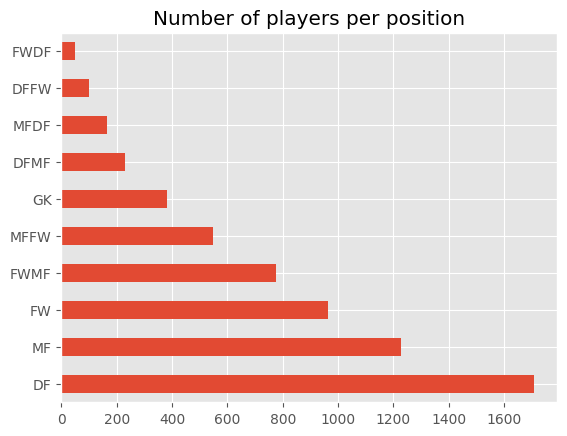

In [6]:
# Counting the amount of players per position
data.Pos.value_counts().plot.barh()
plt.title("Number of players per position")

Here we can see that defense players are the most common. Is it if this distribution is repeated in all leagues?

Text(0.5, 1.0, 'Eredivisie')

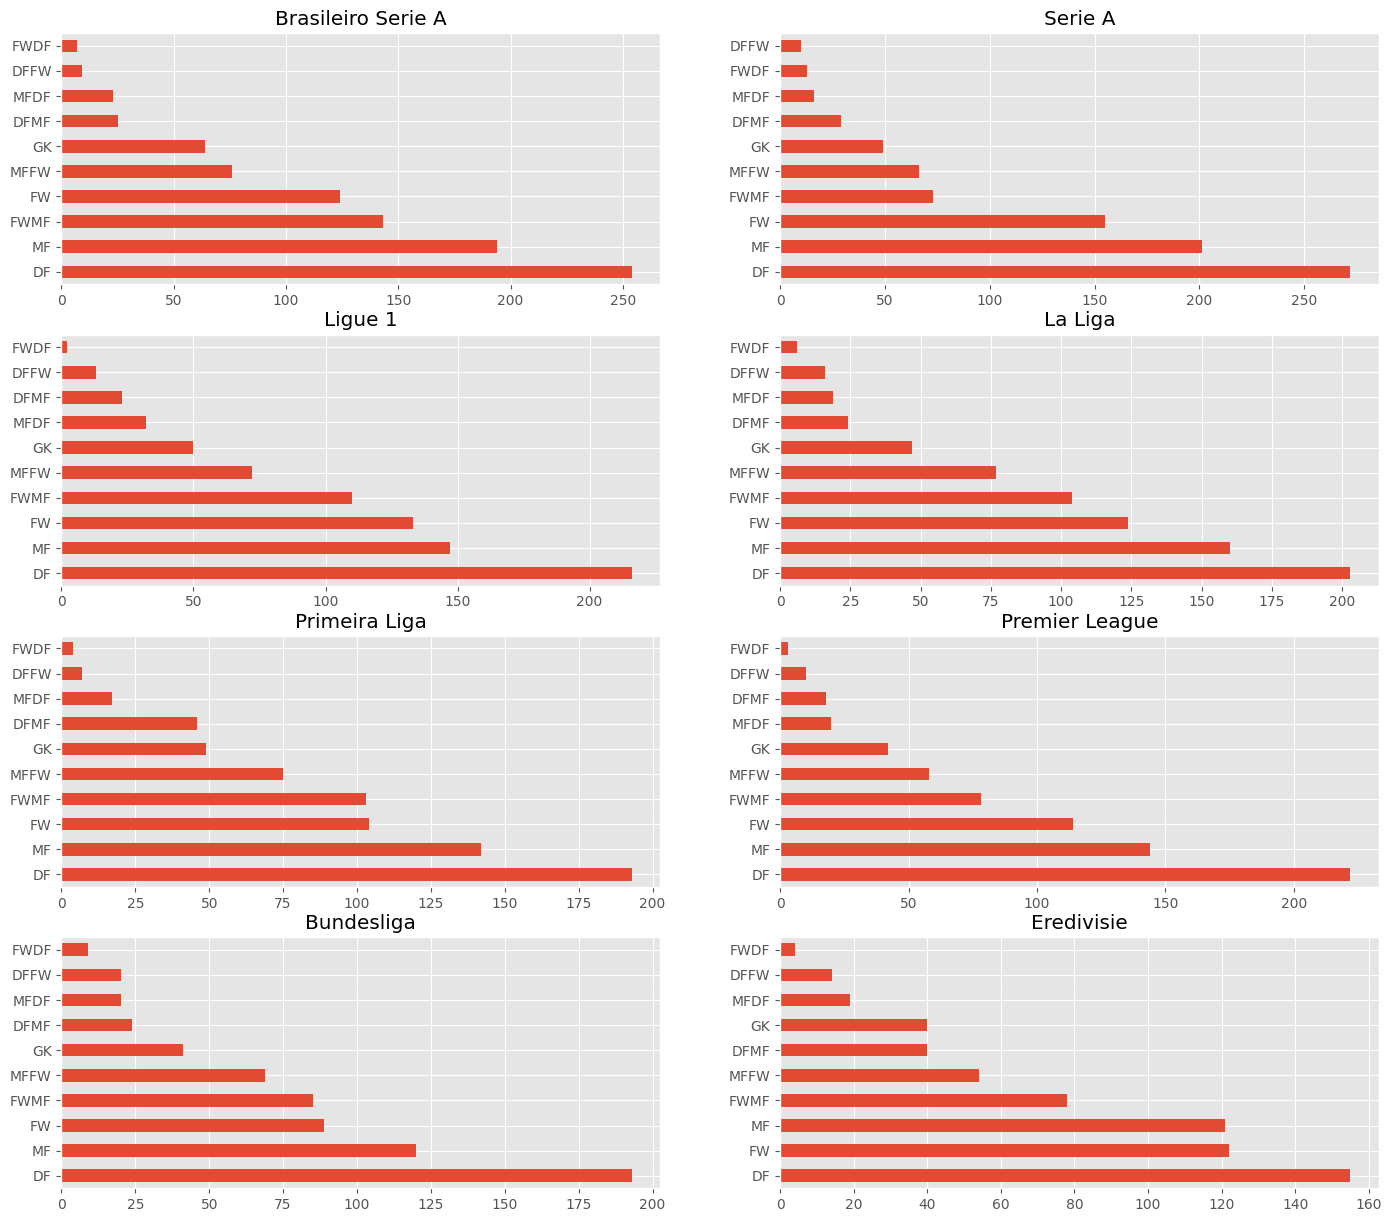

In [78]:
fig, axes = plt.subplots(4, 2, figsize = (17, 15))
data.query(f"Comp == 'Brasileiro Serie A'").Pos.value_counts().plot.barh(ax=axes[0, 0]).set_title('Brasileiro Serie A')
data.query(f"Comp == 'Serie A'").Pos.value_counts().plot.barh(ax=axes[0, 1]).set_title('Serie A')
data.query(f"Comp == 'Ligue 1'").Pos.value_counts().plot.barh(ax=axes[1, 0]).set_title('Ligue 1')
data.query(f"Comp == 'La Liga'").Pos.value_counts().plot.barh(ax=axes[1, 1]).set_title('La Liga')
data.query(f"Comp == 'Primeira Liga'").Pos.value_counts().plot.barh(ax=axes[2, 0]).set_title('Primeira Liga')
data.query(f"Comp == 'Premier League'").Pos.value_counts().plot.barh(ax=axes[2, 1]).set_title('Premier League')
data.query(f"Comp == 'Bundesliga'").Pos.value_counts().plot.barh(ax=axes[3, 0]).set_title('Bundesliga')
data.query(f"Comp == 'Eredivisie'").Pos.value_counts().plot.barh(ax=axes[3, 1]).set_title('Eredivisie')


We can see that the trend seen earlier is repeated in each league, with notable changes in just two leagues:
- The Dutch (Eredivisie), where the number of forwards equals the number of midfielders, which was not seen in other championships.

- The Brazilian (Brasileiro Serie A), where the number of forwarding midfielders exceeds the number of forwards entered in the competition.

### **Q2 - Which competition has the most active players?**